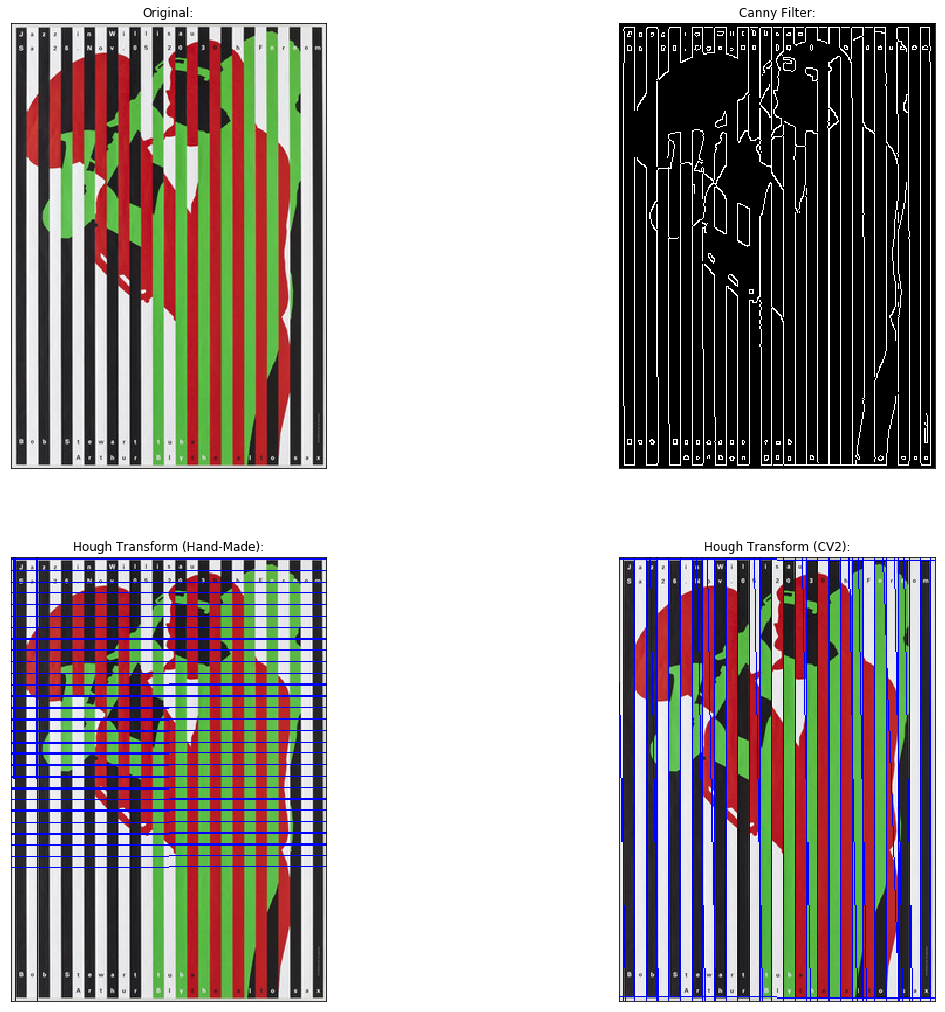

In [47]:
# Task: Hand-Made Hough Transform vs cv2 function

import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from matplotlib import image as im
from skimage import data
from skimage import feature
from math import cos
from math import sin

path = 'jazzmen.jpg'
original = im.imread(path)
copy = original
img_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray, 50, 150, apertureSize = 3)

image_matrix = np.zeros((4670, 361))
i1, j1 = edges.shape

for x in range(1, i1):
    for y in range(1, j1):
        if edges[x, y] == 255:
            for O in range(0, 361):
                p = x*cos(math.radians(O)) - y*sin(math.radians(O))
                p = int(p*10)
                if p >=0:   
                    image_matrix[p, O] = image_matrix[p, O] + 1
                elif p < 0:
                    image_matrix[-p, O] = image_matrix[-p, O] + 1

for p2 in range(0, 4670):
    for O2 in range(0, 361):
        if image_matrix[p2, O2] > 80:
            p3 = p2/10
            a = np.cos(math.radians(O2))
            b = np.sin(math.radians(O2))
            x0 = a*p3
            y0 = b*p3
            x1 = int(x0 + 500*(-b))
            y1 = int(y0 + 500*(a))
            x2 = int(x0 - 500*(-b))
            y2 = int(y0 - 500*(a))
            cv2.line(copy, (x1,y1), (x2,y2), (0,0,255), 1)

another_copy = im.imread('jazzmen.jpg')
another_gray = cv2.cvtColor(another_copy, cv2.COLOR_BGR2GRAY)
another_edge = cv2.Canny(another_gray, 50, 150, apertureSize = 3)

cv2_lines = cv2.HoughLines(another_edge, 1, np.pi/180, 100)
i, j, k = cv2_lines.shape
for lenght in range(0, i):
    for p, O in cv2_lines[lenght]:
        a = np.cos(O)
        b = np.sin(O)
        x0 = a*p
        y0 = b*p
        x1 = int(x0 + 500*(-b))
        y1 = int(y0 + 500*(a))
        x2 = int(x0 - 500*(-b))
        y2 = int(y0 - 500*(a))
        cv2.line(another_copy, (x1,y1), (x2,y2), (0, 0, 255), 1)

original = im.imread(path)
fig = plt.figure(figsize = (20, 18))

plt.subplot(221), plt.imshow(original)
plt.title('Original:'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(edges, cmap = 'gray')
plt.title('Canny Filter:'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(copy, cmap = 'gray')
plt.title('Hough Transform (Hand-Made):'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(another_copy, cmap = 'gray')
plt.title('Hough Transform (CV2):'), plt.xticks([]), plt.yticks([])

plt.show()